In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from csv import reader
import csv

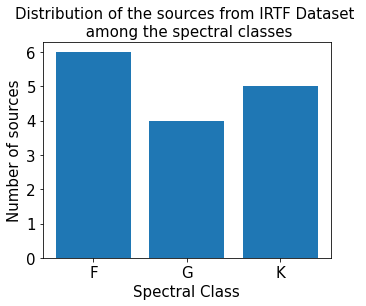

In [2]:
data = {"hd10476": "K1V", "hd11443": "F6IV", "hd21770": "G4III", "hd25975": "K1III", "hd74395": "G1Ib", "hd100006": "K0III", "hd101501": "G8V", "hd102870": "F8.5IV-V", "hd114710": "F9.5V", "hd115617": "G6.5V", "hd120477": "K5.5III", "hd124850": "F7III", "hd126660": "F7V", "hd142091": "K1IVa", "hd220657": "F8III"}
fig = plt.figure(figsize=(4, 3))
ax = fig.add_axes([0,0,1,1])
plot_data = {'F':0, 'G':0, 'K':0}
for i in list(data.values()):
    plot_data[i[0]] += 1
ax.bar(plot_data.keys(),plot_data.values())
plt.xlabel("Spectral Class",fontsize=15)
plt.ylabel("Number of sources",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Distribution of the sources from IRTF Dataset \n among the spectral classes", fontsize=15)
plt.show()

In [3]:
class_data = []
for i in data.values():
    class_data.append(i[0])
class_data = np.array(class_data)

type_data = []
for i in data.values():
    type_data.append(i[2:])
type_data = np.array(type_data)
for i in range(type_data.size):
    if(type_data[i][0] == "."):
        type_data[i] = type_data[i][2:]

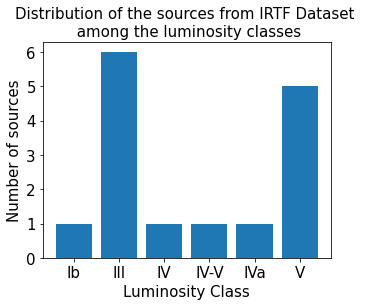

In [4]:
fig = plt.figure(figsize=(4, 3))
ax = fig.add_axes([0,0,1,1])
plot_data = {'Ib':0,'III':0,'IV':0, 'IV-V':0, "IVa": 0, "V":0}
for i in list(data.values()):
    try:
        plot_data[i[2:]] += 1
    except:
        plot_data[i[4:]] += 1
ax.bar(plot_data.keys(),plot_data.values())
plt.xlabel("Luminosity Class",fontsize=15)
plt.ylabel("Number of sources",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Distribution of the sources from IRTF Dataset \n among the luminosity classes", fontsize=15)
plt.show()
type_data = np.array(type_data)

In [5]:
J = []
J_ref = []
J_ref_err = []
H = []
H_ref = []
H_ref_err = []
Ks = []
Ks_ref = []
Ks_ref_err = []
for filename in list(data.keys()):
    data_dir = os.getcwd()+"/IRTF_data_fit/"
    form = '.txt'
    m_ref = {"J": 0, "H": 0,"KS": 0}
    m_err_ref = {"JERR": 0, "HERR": 0,"KSERR": 0}
    ctr = 6
    q = 0
    with open(data_dir+filename+'/'+ filename+form,'r') as f:
        for line in f:
            if(ctr > 0):
                _b = line.split()
                if(q%2 == 0):
                    m_ref[_b[1]] = float(_b[3])
                if(q%2 == 1):
                    m_err_ref[_b[1]] = float(_b[3])
                q += 1
                ctr -= 1
    f.close()
    m_ref["Ks"] = m_ref.pop("KS")
    J_ref.append(m_ref["J"])
    H_ref.append(m_ref["H"])
    Ks_ref.append(m_ref["Ks"])
    J_ref_err.append(m_err_ref["JERR"])
    H_ref_err.append(m_err_ref["HERR"])
    Ks_ref_err.append(m_err_ref["KSERR"])
    with open(os.getcwd() + "/IRTF_data_fit/new_IRTF/"+filename+"_apparent_magnitude.csv", mode='r') as infile:
        reader = csv.reader(infile)
        m = {rows[0]:float(rows[1]) for rows in reader}
    J.append(m["J"])
    H.append(m["H"])
    Ks.append(m["Ks"])
    

Text(0.5, 1.0, 'Ks Band Magnitude')

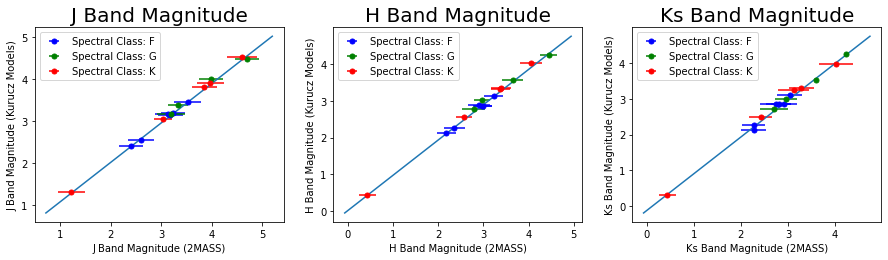

In [9]:
t_f = 20
n_row = 1
n_col = 3
fig = plt.figure(figsize=(4 * n_col, 3 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)

colors = []
for i in data.values():
    if(i[0] == "F"):
        colors.append("blue")
    if(i[0] == "G"):
        colors.append("green")
    if(i[0] == "K"):
        colors.append("red")

J_ref_F = []
J_ref_err_F = []
J_F = []
J_ref_G = []
J_ref_err_G = []
J_G = []
J_ref_K = []
J_ref_err_K = []
J_K = []
for i in range(len(list(data.values()))):
    if(list(data.values())[i][0] == "F"):
        J_ref_F.append(J_ref[i])
        J_ref_err_F.append(J_ref_err[i])
        J_F.append(J[i])
    if(list(data.values())[i][0] == "G"):
        J_ref_G.append(J_ref[i])
        J_ref_err_G.append(J_ref_err[i])
        J_G.append(J[i])
    if(list(data.values())[i][0] == "K"):
        J_ref_K.append(J_ref[i])
        J_ref_err_K.append(J_ref_err[i])
        J_K.append(J[i])

H_ref_F = []
H_ref_err_F = []
H_F = []
H_ref_G = []
H_ref_err_G = []
H_G = []
H_ref_K = []
H_ref_err_K = []
H_K = []
for i in range(len(list(data.values()))):
    if(list(data.values())[i][0] == "F"):
        H_ref_F.append(H_ref[i])
        H_ref_err_F.append(H_ref_err[i])
        H_F.append(H[i])
    if(list(data.values())[i][0] == "G"):
        H_ref_G.append(H_ref[i])
        H_ref_err_G.append(H_ref_err[i])
        H_G.append(H[i])
    if(list(data.values())[i][0] == "K"):
        H_ref_K.append(H_ref[i])
        H_ref_err_K.append(H_ref_err[i])
        H_K.append(H[i])

Ks_ref_F = []
Ks_ref_err_F = []
Ks_F = []
Ks_ref_G = []
Ks_ref_err_G = []
Ks_G = []
Ks_ref_K = []
Ks_ref_err_K = []
Ks_K = []
for i in range(len(list(data.values()))):
    if(list(data.values())[i][0] == "F"):
        Ks_ref_F.append(Ks_ref[i])
        Ks_ref_err_F.append(Ks_ref_err[i])
        Ks_F.append(Ks[i])
    if(list(data.values())[i][0] == "G"):
        Ks_ref_G.append(Ks_ref[i])
        Ks_ref_err_G.append(Ks_ref_err[i])
        Ks_G.append(Ks[i])
    if(list(data.values())[i][0] == "K"):
        Ks_ref_K.append(Ks_ref[i])
        Ks_ref_err_K.append(Ks_ref_err[i])
        Ks_K.append(Ks[i])

ax = fig.add_subplot(n_row,n_col,1)
point1 = [min(J_ref)-0.5, min(J)-0.5]
point2 = [max(J_ref)+0.5, max(J)+0.5]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt. plot(x_values, y_values)
#plt.errorbar(J_ref, J, xerr=J_ref_err, fmt='.k',markersize='10',color=colors);
plt.errorbar(J_ref_F, J_F, xerr = J_ref_err_F, fmt='ob',markersize='5',
             label ='Spectral Class: F') 
plt.errorbar(J_ref_G, J_G, xerr = J_ref_err_G, fmt='og',markersize='5',
             uplims = True,  
             label ='Spectral Class: G') 
plt.errorbar(J_ref_K, J_K, xerr = J_ref_err_K, fmt='or',markersize='5',
             uplims = True,  
             lolims = True, 
             label ='Spectral Class: K') 
plt.xlabel("J Band Magnitude (2MASS)")
plt.ylabel("J Band Magnitude (Kurucz Models)")
plt.legend(loc ='upper left')   
plt.title("J Band Magnitude",fontsize=t_f)
ax = fig.add_subplot(n_row,n_col,2)
point1 = [min(H_ref)-0.5, min(H)-0.5]
point2 = [max(H_ref)+0.5, max(H)+0.5]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt. plot(x_values, y_values)
plt.errorbar(H_ref_F, H_F, xerr = H_ref_err_F, fmt='ob',markersize='5',
             label ='Spectral Class: F') 
plt.errorbar(H_ref_G, H_G, xerr = H_ref_err_G, fmt='og',markersize='5',
             uplims = True,  
             label ='Spectral Class: G') 
plt.errorbar(H_ref_K, H_K, xerr = H_ref_err_K, fmt='or',markersize='5',
             uplims = True,  
             lolims = True, 
             label ='Spectral Class: K') 
plt.xlabel("H Band Magnitude (2MASS)")
plt.ylabel("H Band Magnitude (Kurucz Models)")
plt.legend(loc ='upper left')   
plt.title("H Band Magnitude",fontsize=t_f)
ax = fig.add_subplot(n_row,n_col,3)
point1 = [min(Ks_ref)-0.5, min(Ks)-0.5]
point2 = [max(Ks_ref)+0.5, max(Ks)+0.5]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt. plot(x_values, y_values)
plt.errorbar(Ks_ref_F, Ks_F, xerr = Ks_ref_err_F, fmt='ob',markersize='5',
             label ='Spectral Class: F') 
plt.errorbar(Ks_ref_G, Ks_G, xerr = Ks_ref_err_G, fmt='og',markersize='5',
             uplims = True,  
             label ='Spectral Class: G') 
plt.errorbar(Ks_ref_K, Ks_K, xerr = Ks_ref_err_K, fmt='or',markersize='5',
             uplims = True,  
             lolims = True, 
             label ='Spectral Class: K') 
plt.xlabel("Ks Band Magnitude (2MASS)")
plt.ylabel("Ks Band Magnitude (Kurucz Models)")
plt.legend(loc ='upper left')   
plt.title("Ks Band Magnitude",fontsize=t_f)

In [12]:
J_F = np.array(J_F)
J_G = np.array(J_G)
J_K = np.array(J_K)
J_ref_F = np.array(J_ref_F)
J_ref_G = np.array(J_ref_G)
J_ref_K = np.array(J_ref_K)

H_F = np.array(H_F)
H_G = np.array(H_G)
H_K = np.array(H_K)
H_ref_F = np.array(H_ref_F)
H_ref_G = np.array(H_ref_G)
H_ref_K = np.array(H_ref_K)

Ks_F = np.array(Ks_F)
Ks_G = np.array(Ks_G)
Ks_K = np.array(Ks_K)
Ks_ref_F = np.array(Ks_ref_F)
Ks_ref_G = np.array(Ks_ref_G)
Ks_ref_K = np.array(Ks_ref_K)

J_ref = np.array(J_ref)
H_ref = np.array(H_ref)
Ks_ref = np.array(Ks_ref)

J = np.array(J)
H = np.array(H)
Ks = np.array(Ks)

In [22]:
J_ref_err_G

[0.24, 0.278, 0.242, 0.2]

/home/kiran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:49: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


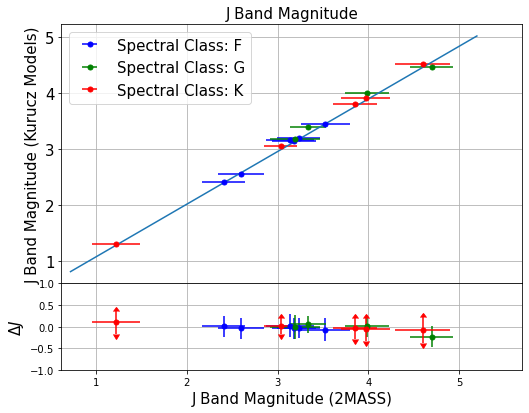

In [23]:
t_f = 15
n_row = 1
n_col = 2

fig1 = plt.figure(1,figsize=(8,6))
#Plot Data-model
frame1 = fig1.add_axes((.1,.3,.8,.6))
point1 = [min(J_ref)-0.5, min(J)-0.5]
point2 = [max(J_ref)+0.5, max(J)+0.5]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt. plot(x_values, y_values)
#plt.errorbar(J_ref, J, xerr=J_ref_err, fmt='.k',markersize='10',color=colors);
plt.errorbar(J_ref_F, J_F, xerr = J_ref_err_F, fmt='ob',markersize='5',
             label ='Spectral Class: F') 
plt.errorbar(J_ref_G, J_G, xerr = J_ref_err_G, fmt='og',markersize='5',
             uplims = True,  
             label ='Spectral Class: G') 
plt.errorbar(J_ref_K, J_K, xerr = J_ref_err_K, fmt='or',markersize='5',
             uplims = True,  
             lolims = True, 
             label ='Spectral Class: K') 
plt.xlabel("J Band Magnitude (2MASS)",fontsize=t_f)
plt.ylabel("J Band Magnitude (Kurucz Models)",fontsize=t_f)
plt.legend(loc ='upper left',fontsize=t_f)   
plt.title("J Band Magnitude",fontsize=t_f)

frame1.set_xticklabels([]) #Remove x-tic labels for the first frame
plt.xticks(fontsize=t_f)
plt.yticks(fontsize=t_f)
plt.grid()
plt.xlim(x_values[0]-0.1,x_values[-1]+0.5)

frame2=fig1.add_axes((.1,.1,.8,.2))        
plt.errorbar(J_ref_F, J_F-J_ref_F, xerr = J_ref_err_F, yerr = J_ref_err_F, fmt='ob',markersize='5',
             label ='Spectral Class: F') 
plt.errorbar(J_ref_G, J_G-J_ref_G, xerr = J_ref_err_G, yerr = J_ref_err_G, fmt='og',markersize='5',
             label ='Spectral Class: G') 
plt.errorbar(J_ref_K, J_K-J_ref_K, xerr = J_ref_err_K, yerr = J_ref_err_K, fmt='or',markersize='5',
             label ='Spectral Class: K') 
plt.xlabel("J Band Magnitude (2MASS)",fontsize=t_f)
plt.ylabel(r"$\Delta J$",fontsize=t_f)
plt.grid()
plt.xlim(x_values[0]-0.1,x_values[-1]+0.5)
plt.ylim(-1.0,1.0)
#plt.legend(loc ='upper left')   
fig1.tight_layout(pad=0.1)

Text(0.5, 1.0, '$\\Delta J$ vs J Band Magnitude Comparison')

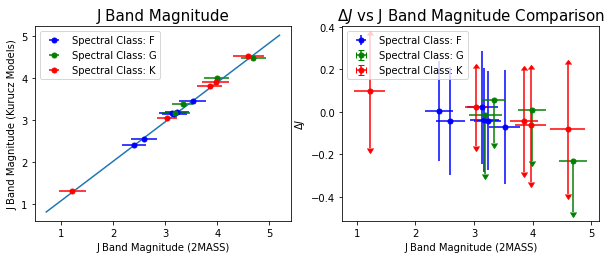

In [50]:

t_f = 15
n_row = 1
n_col = 2
fig = plt.figure(figsize=(4 * n_col, 3 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)

ax = fig.add_subplot(n_row,n_col,1)
point1 = [min(J_ref)-0.5, min(J)-0.5]
point2 = [max(J_ref)+0.5, max(J)+0.5]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt. plot(x_values, y_values)
#plt.errorbar(J_ref, J, xerr=J_ref_err, fmt='.k',markersize='10',color=colors);
plt.errorbar(J_ref_F, J_F, xerr = J_ref_err_F, fmt='ob',markersize='5',
             label ='Spectral Class: F') 
plt.errorbar(J_ref_G, J_G, xerr = J_ref_err_G, fmt='og',markersize='5',
             uplims = True,  
             label ='Spectral Class: G') 
plt.errorbar(J_ref_K, J_K, xerr = J_ref_err_K, fmt='or',markersize='5',
             uplims = True,  
             lolims = True, 
             label ='Spectral Class: K') 
plt.xlabel("J Band Magnitude (2MASS)")
plt.ylabel("J Band Magnitude (Kurucz Models)")
plt.legend(loc ='upper left')   
plt.title("J Band Magnitude",fontsize=t_f)

#plt.savefig(os.getcwd()+"/stelib_V3.2_corr_fits/new_selected/stelib_U_mag_comparison.png")

ax = fig.add_subplot(n_row,n_col,2)
#plt.errorbar(J_ref, J, xerr=J_ref_err, fmt='.k',markersize='10',color=colors);
plt.errorbar(J_ref_F, J_F-J_ref_F, xerr = J_ref_err_F, yerr = J_ref_err_F, fmt='ob',markersize='5',
             label ='Spectral Class: F') 
plt.errorbar(J_ref_G, J_G-J_ref_G, xerr = J_ref_err_G, yerr = J_ref_err_G, fmt='og',markersize='5',
             uplims = True,  
             label ='Spectral Class: G') 
plt.errorbar(J_ref_K, J_K-J_ref_K, xerr = J_ref_err_K, yerr = J_ref_err_K, fmt='or',markersize='5',
             uplims = True,  
             lolims = True, 
             label ='Spectral Class: K') 
plt.xlabel("J Band Magnitude (2MASS)")
plt.ylabel(r"$\Delta J$")
plt.legend(loc ='upper left')   
plt.title(r"$\Delta J$ vs J Band Magnitude Comparison",fontsize=t_f)


/home/kiran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


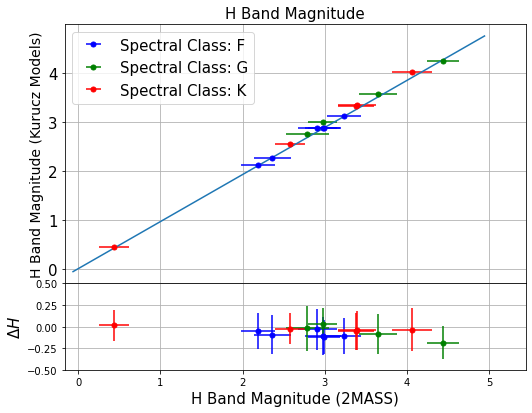

In [30]:
t_f = 15
n_row = 1
n_col = 2

fig1 = plt.figure(1,figsize=(8,6))
#Plot Data-model
frame1 = fig1.add_axes((.1,.3,.8,.6))
point1 = [min(H_ref)-0.5, min(H)-0.5]
point2 = [max(H_ref)+0.5, max(H)+0.5]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt. plot(x_values, y_values)
#plt.errorbar(J_ref, J, xerr=J_ref_err, fmt='.k',markersize='10',color=colors);
plt.errorbar(H_ref_F, H_F, xerr = H_ref_err_F, fmt='ob',markersize='5',
             label ='Spectral Class: F') 
plt.errorbar(H_ref_G, H_G, xerr = H_ref_err_G, fmt='og',markersize='5',
             uplims = True,  
             label ='Spectral Class: G') 
plt.errorbar(H_ref_K, H_K, xerr = H_ref_err_K, fmt='or',markersize='5',
             uplims = True,  
             lolims = True, 
             label ='Spectral Class: K') 
plt.xlabel("H Band Magnitude (2MASS)",fontsize=t_f)
plt.ylabel("H Band Magnitude (Kurucz Models)",fontsize=t_f-1)
plt.legend(loc ='upper left',fontsize=t_f)   
plt.title("H Band Magnitude",fontsize=t_f)

frame1.set_xticklabels([]) #Remove x-tic labels for the first frame
plt.xticks(fontsize=t_f)
plt.yticks(fontsize=t_f)
plt.grid()
plt.xlim(x_values[0]-0.1,x_values[-1]+0.5)

frame2=fig1.add_axes((.1,.1,.8,.2))        
plt.errorbar(H_ref_F, H_F-H_ref_F, xerr = H_ref_err_F, yerr = H_ref_err_F, fmt='ob',markersize='5',
             label ='Spectral Class: F') 
plt.errorbar(H_ref_G, H_G-H_ref_G, xerr = H_ref_err_G, yerr = H_ref_err_G, fmt='og',markersize='5',
             label ='Spectral Class: G') 
plt.errorbar(H_ref_K, H_K-H_ref_K, xerr = H_ref_err_K, yerr = H_ref_err_K, fmt='or',markersize='5',
             label ='Spectral Class: K') 
plt.xlabel("H Band Magnitude (2MASS)",fontsize=t_f)
plt.ylabel(r"$\Delta H$",fontsize=t_f)
plt.grid()
plt.xlim(x_values[0]-0.1,x_values[-1]+0.5)
plt.ylim(-0.5,0.5)
#plt.legend(loc ='upper left')   
fig1.tight_layout(pad=0.1)

Text(0.5, 1.0, '$\\Delta H$ vs H Band Magnitude')

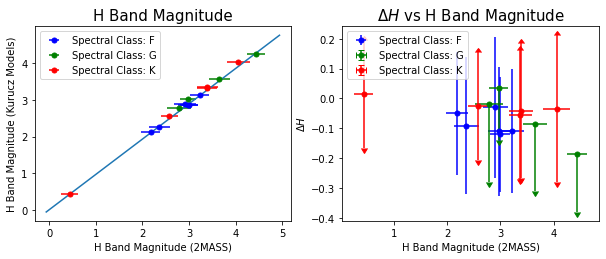

In [51]:
t_f = 15
n_row = 1
n_col = 2
fig = plt.figure(figsize=(4 * n_col, 3 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)

ax = fig.add_subplot(n_row,n_col,1)
point1 = [min(H_ref)-0.5, min(H)-0.5]
point2 = [max(H_ref)+0.5, max(H)+0.5]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt. plot(x_values, y_values)
#plt.errorbar(J_ref, J, xerr=J_ref_err, fmt='.k',markersize='10',color=colors);
plt.errorbar(H_ref_F, H_F, xerr = H_ref_err_F, fmt='ob',markersize='5',
             label ='Spectral Class: F') 
plt.errorbar(H_ref_G, H_G, xerr = H_ref_err_G, fmt='og',markersize='5',
             uplims = True,  
             label ='Spectral Class: G') 
plt.errorbar(H_ref_K, H_K, xerr = H_ref_err_K, fmt='or',markersize='5',
             uplims = True,  
             lolims = True, 
             label ='Spectral Class: K') 
plt.xlabel("H Band Magnitude (2MASS)")
plt.ylabel("H Band Magnitude (Kurucz Models)")
plt.legend(loc ='upper left')   
plt.title("H Band Magnitude",fontsize=t_f)

#plt.savefig(os.getcwd()+"/stelib_V3.2_corr_fits/new_selected/stelib_U_mag_comparison.png")

ax = fig.add_subplot(n_row,n_col,2)
#plt.errorbar(J_ref, J, xerr=J_ref_err, fmt='.k',markersize='10',color=colors);
plt.errorbar(H_ref_F, H_F-H_ref_F, xerr = H_ref_err_F, yerr = H_ref_err_F, fmt='ob',markersize='5',
             label ='Spectral Class: F') 
plt.errorbar(H_ref_G, H_G-H_ref_G, xerr = H_ref_err_G, yerr = H_ref_err_G, fmt='og',markersize='5',
             uplims = True,  
             label ='Spectral Class: G') 
plt.errorbar(H_ref_K, H_K-H_ref_K, xerr = H_ref_err_K, yerr = H_ref_err_K, fmt='or',markersize='5',
             uplims = True,  
             lolims = True, 
             label ='Spectral Class: K') 
plt.xlabel("H Band Magnitude (2MASS)")
plt.ylabel(r"$\Delta H$")
plt.legend(loc ='upper left')   
plt.title(r"$\Delta H$ vs H Band Magnitude",fontsize=t_f)




/home/kiran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


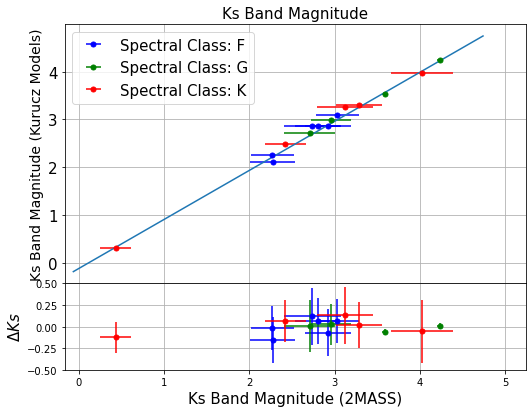

In [31]:
t_f = 15
n_row = 1
n_col = 2

fig1 = plt.figure(1,figsize=(8,6))
#Plot Data-model
frame1 = fig1.add_axes((.1,.3,.8,.6))
point1 = [min(Ks_ref)-0.5, min(Ks)-0.5]
point2 = [max(Ks_ref)+0.5, max(Ks)+0.5]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt. plot(x_values, y_values)
#plt.errorbar(J_ref, J, xerr=J_ref_err, fmt='.k',markersize='10',color=colors);
plt.errorbar(Ks_ref_F, Ks_F, xerr = Ks_ref_err_F, fmt='ob',markersize='5',
             label ='Spectral Class: F') 
plt.errorbar(Ks_ref_G, Ks_G, xerr = Ks_ref_err_G, fmt='og',markersize='5',
             uplims = True,  
             label ='Spectral Class: G') 
plt.errorbar(Ks_ref_K, Ks_K, xerr = Ks_ref_err_K, fmt='or',markersize='5',
             uplims = True,  
             lolims = True, 
             label ='Spectral Class: K') 
plt.xlabel("Ks Band Magnitude (2MASS)",fontsize=t_f)
plt.ylabel("Ks Band Magnitude (Kurucz Models)",fontsize=t_f-1)
plt.legend(loc ='upper left',fontsize=t_f)   
plt.title("Ks Band Magnitude",fontsize=t_f)

frame1.set_xticklabels([]) #Remove x-tic labels for the first frame
plt.xticks(fontsize=t_f)
plt.yticks(fontsize=t_f)
plt.grid()
plt.xlim(x_values[0]-0.1,x_values[-1]+0.5)

frame2=fig1.add_axes((.1,.1,.8,.2))        
plt.errorbar(Ks_ref_F, Ks_F-Ks_ref_F, xerr = Ks_ref_err_F, yerr = Ks_ref_err_F, fmt='ob',markersize='5',
             label ='Spectral Class: F') 
plt.errorbar(Ks_ref_G, Ks_G-Ks_ref_G, xerr = Ks_ref_err_G, yerr = Ks_ref_err_G, fmt='og',markersize='5',
             label ='Spectral Class: G') 
plt.errorbar(Ks_ref_K, Ks_K-Ks_ref_K, xerr = Ks_ref_err_K, yerr = Ks_ref_err_K, fmt='or',markersize='5',
             label ='Spectral Class: K') 
plt.xlabel("Ks Band Magnitude (2MASS)",fontsize=t_f)
plt.ylabel(r"$\Delta Ks$",fontsize=t_f)
plt.grid()
plt.xlim(x_values[0]-0.1,x_values[-1]+0.5)
plt.ylim(-0.5,0.5)
#plt.legend(loc ='upper left')   
fig1.tight_layout(pad=0.1)

Text(0.5, 1.0, '$\\Delta Ks$ vs Ks Band Magnitude')

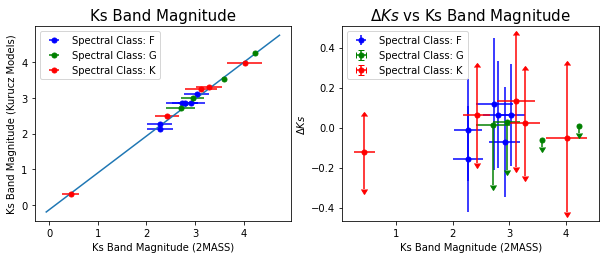

In [52]:
t_f = 15
n_row = 1
n_col = 2
fig = plt.figure(figsize=(4 * n_col, 3 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)

ax = fig.add_subplot(n_row,n_col,1)
point1 = [min(Ks_ref)-0.5, min(Ks)-0.5]
point2 = [max(Ks_ref)+0.5, max(Ks)+0.5]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt. plot(x_values, y_values)
#plt.errorbar(J_ref, J, xerr=J_ref_err, fmt='.k',markersize='10',color=colors);
plt.errorbar(Ks_ref_F, Ks_F, xerr = Ks_ref_err_F, fmt='ob',markersize='5',
             label ='Spectral Class: F') 
plt.errorbar(Ks_ref_G, Ks_G, xerr = Ks_ref_err_G, fmt='og',markersize='5',
             uplims = True,  
             label ='Spectral Class: G') 
plt.errorbar(Ks_ref_K, Ks_K, xerr = Ks_ref_err_K, fmt='or',markersize='5',
             uplims = True,  
             lolims = True, 
             label ='Spectral Class: K') 
plt.xlabel("Ks Band Magnitude (2MASS)")
plt.ylabel("Ks Band Magnitude (Kurucz Models)")
plt.legend(loc ='upper left')   
plt.title("Ks Band Magnitude",fontsize=t_f)

#plt.savefig(os.getcwd()+"/stelib_V3.2_corr_fits/new_selected/stelib_U_mag_comparison.png")

ax = fig.add_subplot(n_row,n_col,2)
#plt.errorbar(J_ref, J, xerr=J_ref_err, fmt='.k',markersize='10',color=colors);
plt.errorbar(Ks_ref_F, Ks_F-Ks_ref_F, xerr = Ks_ref_err_F, yerr = Ks_ref_err_F, fmt='ob',markersize='5',
             label ='Spectral Class: F') 
plt.errorbar(Ks_ref_G, Ks_G-Ks_ref_G, xerr = Ks_ref_err_G, yerr = Ks_ref_err_G, fmt='og',markersize='5',
             uplims = True,  
             label ='Spectral Class: G') 
plt.errorbar(Ks_ref_K, Ks_K-Ks_ref_K, xerr = Ks_ref_err_K, yerr = Ks_ref_err_K, fmt='or',markersize='5',
             uplims = True,  
             lolims = True, 
             label ='Spectral Class: K') 
plt.xlabel("Ks Band Magnitude (2MASS)")
plt.ylabel(r"$\Delta Ks$")
plt.legend(loc ='upper left')   
plt.title(r"$\Delta Ks$ vs Ks Band Magnitude",fontsize=t_f)


Text(0.5, 1.0, '$\\Delta(H-Ks)$ vs (H-Ks) Comparison')

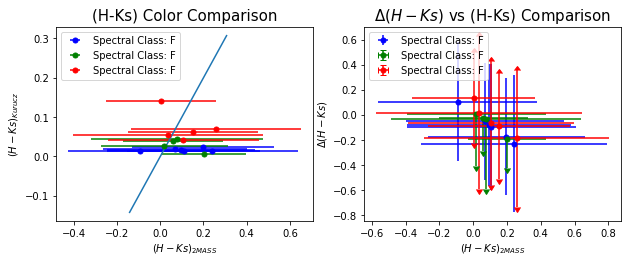

In [70]:

t_f = 15
n_row = 1
n_col = 2
fig = plt.figure(figsize=(4 * n_col, 3 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)

ax = fig.add_subplot(n_row,n_col,1)
p1 = min(min(H_ref-Ks_ref)-0.05, min(H-Ks)-0.05)
point1 = [p1,p1]
p2 = max(max(H_ref-Ks_ref)+0.05, max(H-Ks)+0.05)
point2 = [p2,p2]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt. plot(x_values, y_values)
#plt.errorbar(J_ref, J, xerr=J_ref_err, fmt='.k',markersize='10',color=colors);
plt.errorbar(H_ref_F-Ks_ref_F, H_F-Ks_F, xerr = np.sqrt(np.abs(Ks_ref_err_F)**2+np.abs(H_ref_err_F)**2), fmt='ob',markersize='5',
             label ='Spectral Class: F') 
plt.errorbar(H_ref_G-Ks_ref_G, H_G-Ks_G, xerr = np.sqrt(np.abs(Ks_ref_err_G)**2+np.abs(H_ref_err_G)**2), fmt='og',markersize='5',
             uplims = True, label ='Spectral Class: F') 
plt.errorbar(H_ref_K-Ks_ref_K, H_K-Ks_K, xerr = np.sqrt(np.abs(Ks_ref_err_K)**2+np.abs(H_ref_err_K)**2), fmt='or',markersize='5',
             uplims = True, lolims = True, label ='Spectral Class: F') 

plt.xlabel(r"$(H-Ks)_{2MASS}$")
plt.ylabel(r"$(H-Ks)_{Kurucz}$")
plt.legend(loc ='upper left')   
plt.title("(H-Ks) Color Comparison",fontsize=t_f)

#plt.savefig(os.getcwd()+"/stelib_V3.2_corr_fits/new_selected/stelib_U_mag_comparison.png")

ax = fig.add_subplot(n_row,n_col,2)
#plt.errorbar(J_ref, J, xerr=J_ref_err, fmt='.k',markersize='10',color=colors);
plt.errorbar(H_ref_F-Ks_ref_F, (H_F-Ks_F) - (H_ref_F-Ks_ref_F), xerr = np.abs(Ks_ref_err_F)+np.abs(H_ref_err_F), yerr = np.abs(Ks_ref_err_F)+np.abs(H_ref_err_F),fmt='ob',markersize='5',
             label ='Spectral Class: F') 
plt.errorbar(H_ref_G-Ks_ref_G, (H_G-Ks_G)-(H_ref_G-Ks_ref_G), xerr = np.abs(Ks_ref_err_G)+np.abs(H_ref_err_G), yerr = np.abs(Ks_ref_err_G)+np.abs(H_ref_err_G), fmt='og',markersize='5',
             uplims = True, label ='Spectral Class: F') 
plt.errorbar(H_ref_K-Ks_ref_K, (H_K-Ks_K)-(H_ref_K-Ks_ref_K), xerr = np.abs(Ks_ref_err_K)+np.abs(H_ref_err_K), yerr = np.abs(Ks_ref_err_K)+np.abs(H_ref_err_K), fmt='or',markersize='5',
             uplims = True, lolims = True, label ='Spectral Class: F') 

plt.xlabel(r"$(H-Ks)_{2MASS}$")
plt.ylabel(r"$\Delta(H-Ks)$")
plt.legend(loc ='upper left')   
plt.title(r"$\Delta(H-Ks)$ vs (H-Ks) Comparison",fontsize=t_f)


Text(0.5, 1.0, 'Metallicity')

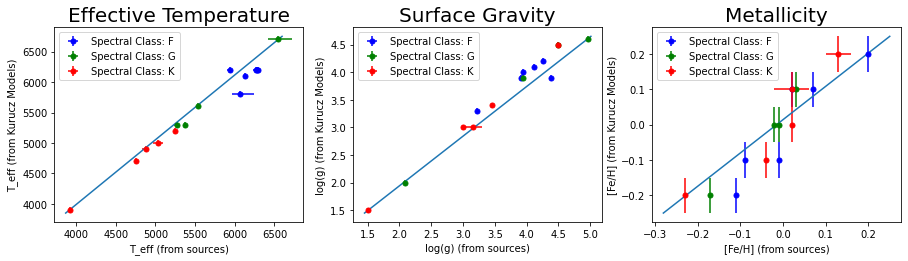

In [7]:
t_k = np.array([5200, 6200, 6700, 5000, 5300, 4700, 5300, 6100, 6200, 5600, 3900, 6200, 6200, 4900, 5800])
t_irtf = np.array([5242,6288,6546,5028,5370,4755,5270,6132,5936,5538,3920,6282,6265,4876,6061])
t_k_e = np.ones(t_k.size)*50
#t_2mass_e = np.array([[3.2,-3.2],[0,0],[126,-176],[61,-70],[0,0],[0,0],[32,-32],[26,-26],[33,33],[13,13],[0,0],[0,0],[41,-41],[46,-46],[97,-176]]).T
t_irtf_e = np.array([[3.2,3.2],[0,0],[126,176],[61,70],[0,0],[0,0],[32,32],[26,26],[33,33],[13,13],[0,0],[0,0],[41,41],[46,46],[97,176]]).T

g_k = np.array([4.5, 3.9, 3.9, 3.4, 2.0, 3.0, 4.6, 4.2, 3.9, 4.5, 1.5, 4.0, 4.1, 3.0, 3.3])
g_irtf = np.array([4.50,3.91,3.94,3.45,2.08,3.00,4.96,4.25,4.38,4.5,1.5,3.94,4.12,3.15,3.22])
g_k_e = np.ones(g_k.size)*0.05
#t_2mass_e = np.array([[3.2,-3.2],[0,0],[126,-176],[61,-70],[0,0],[0,0],[32,-32],[26,-26],[33,33],[13,13],[0,0],[0,0],[41,-41],[46,-46],[97,-176]]).T
g_irtf_e = np.array([0,0,0, 0,0,0, 0,0,0, 0,0,0, 0,0.14,0])

m_k = np.array([-0.1,-0.1,-0.2,0.1,0.0,0.0,0.1,0.2,0.1,0.0,-0.2,-0.2,0.1,0.2,-0.1])
m_irtf = np.array([-0.04, -0.09, -0.17,0.02,-0.01, 0.02, 0.03, 0.2, 0.07, -0.02, -0.23, -0.11, 0.02, 0.13, -0.01])
m_k_e = np.ones(m_k.size)*0.05
#t_2mass_e = np.array([[3.2,-3.2],[0,0],[126,-176],[61,-70],[0,0],[0,0],[32,-32],[26,-26],[33,33],[13,13],[0,0],[0,0],[41,-41],[46,-46],[97,-176]]).T
m_irtf_e = np.array([0,0,0, 0.04,0,0, 0,0,0, 0,0,0, 0,0.03,0])

t_f = 20
n_row = 1
n_col = 3
fig = plt.figure(figsize=(4 * n_col, 3 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)

ax = fig.add_subplot(n_row,n_col,1)
point1 = [min(t_irtf)-50, min(t_k)-50]
point2 = [max(t_irtf)+50, max(t_k)+50]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt. plot(x_values, y_values)
idx = np.where(class_data == "F")
plt.errorbar(t_irtf[idx], t_k[idx], xerr=t_irtf_e.T[idx].T, yerr=t_k_e[idx], fmt='ob',markersize='5',label ='Spectral Class: F');
idx = np.where(class_data == "G")
plt.errorbar(t_irtf[idx], t_k[idx], xerr=t_irtf_e.T[idx].T, yerr=t_k_e[idx], fmt='og',markersize='5',label ='Spectral Class: G');
idx = np.where(class_data == "K")
plt.errorbar(t_irtf[idx], t_k[idx], xerr=t_irtf_e.T[idx].T, yerr=t_k_e[idx], fmt='or',markersize='5',label ='Spectral Class: K');
plt.xlabel("T_eff (from sources)")
plt.ylabel("T_eff (from Kurucz Models)")
plt.legend(loc ='upper left')   
plt.title("Effective Temperature",fontsize=t_f)

ax = fig.add_subplot(n_row,n_col,2)
point1 = [min(g_irtf)-0.050, min(g_k)-0.05]
point2 = [max(g_irtf)+0.050, max(g_k)+0.05]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt. plot(x_values, y_values)
idx = np.where(class_data == "F")
plt.errorbar(g_irtf[idx], g_k[idx], xerr=g_irtf_e.T[idx].T, yerr=g_k_e[idx], fmt='ob',markersize='5',label ='Spectral Class: F');
idx = np.where(class_data == "G")
plt.errorbar(g_irtf[idx], g_k[idx], xerr=g_irtf_e.T[idx].T, yerr=g_k_e[idx], fmt='og',markersize='5',label ='Spectral Class: G');
idx = np.where(class_data == "K")
plt.errorbar(g_irtf[idx], g_k[idx], xerr=g_irtf_e.T[idx].T, yerr=g_k_e[idx], fmt='or',markersize='5',label ='Spectral Class: K');
plt.xlabel("log(g) (from sources)")
plt.ylabel("log(g) (from Kurucz Models)")
plt.legend(loc ='upper left')   
plt.title("Surface Gravity",fontsize=t_f)
#plt.ylabel("J Band Magnitude (Kurucz Models)")

ax = fig.add_subplot(n_row,n_col,3)
point1 = [min(m_irtf)-0.050, min(m_k)-0.050]
point2 = [max(m_irtf)+0.050, max(m_k)+0.050]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt. plot(x_values, y_values)
idx = np.where(class_data == "F")
plt.errorbar(m_irtf[idx], m_k[idx], xerr=m_irtf_e.T[idx].T, yerr=m_k_e[idx], fmt='ob',markersize='5',label ='Spectral Class: F');
idx = np.where(class_data == "G")
plt.errorbar(m_irtf[idx], m_k[idx], xerr=m_irtf_e.T[idx].T, yerr=m_k_e[idx], fmt='og',markersize='5',label ='Spectral Class: G');
idx = np.where(class_data == "K")
plt.errorbar(m_irtf[idx], m_k[idx], xerr=m_irtf_e.T[idx].T, yerr=m_k_e[idx], fmt='or',markersize='5',label ='Spectral Class: K');
plt.xlabel("[Fe/H] (from sources)")
plt.ylabel("[Fe/H] (from Kurucz Models)")
plt.legend(loc ='upper left')   
plt.title("Metallicity",fontsize=t_f)


/home/kiran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:45: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


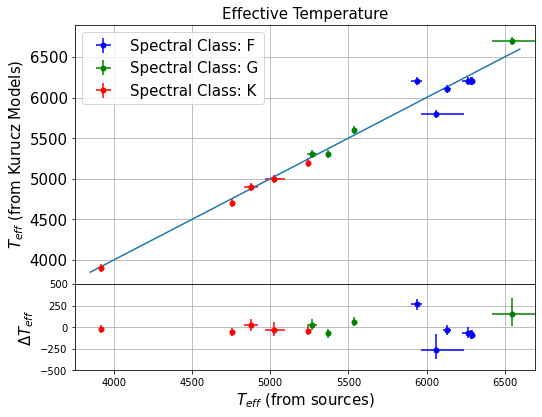

In [9]:
t_f = 15
n_row = 1
n_col = 2

fig1 = plt.figure(1,figsize=(8,6))
#Plot Data-model
frame1 = fig1.add_axes((.1,.3,.8,.6))
point1 = [min(t_irtf)-50, min(t_k)-50]
point2 = [max(t_irtf)+50, max(t_k)+50]
p1 = min(point1[0],point1[1])
p2 = min(point2[0],point2[1])
x_values = [p1, p2] #gather x-values.
y_values = [p1, p2] #gather y-values.
plt. plot(x_values, y_values)
idx = np.where(class_data == "F")
plt.errorbar(t_irtf[idx], t_k[idx], xerr=t_irtf_e.T[idx].T, yerr=t_k_e[idx], fmt='ob',markersize='5',label ='Spectral Class: F');
idx = np.where(class_data == "G")
plt.errorbar(t_irtf[idx], t_k[idx], xerr=t_irtf_e.T[idx].T, yerr=t_k_e[idx], fmt='og',markersize='5',label ='Spectral Class: G');
idx = np.where(class_data == "K")
plt.errorbar(t_irtf[idx], t_k[idx], xerr=t_irtf_e.T[idx].T, yerr=t_k_e[idx], fmt='or',markersize='5',label ='Spectral Class: K');
plt.xlabel(r"$T_{eff}$ (from sources)",fontsize=t_f)
plt.ylabel(r"$T_{eff}$ (from Kurucz Models)",fontsize=t_f)
plt.legend(loc ='upper left',fontsize=t_f)   
plt.title("Effective Temperature",fontsize=t_f)

frame1.set_xticklabels([]) #Remove x-tic labels for the first frame
plt.xticks(fontsize=t_f)
plt.yticks(fontsize=t_f)
plt.grid()
plt.xlim(x_values[0]-100,x_values[-1]+100)

frame2=fig1.add_axes((.1,.1,.8,.2))        
idx = np.where(class_data == "F")
plt.errorbar(t_irtf[idx], t_k[idx]-t_irtf[idx], xerr=t_irtf_e.T[idx].T, yerr=np.sqrt(t_k_e[idx]**2 + t_irtf_e.T[idx].T**2), fmt='ob',markersize='5',label ='Spectral Class: F');
idx = np.where(class_data == "G")
plt.errorbar(t_irtf[idx], t_k[idx]-t_irtf[idx], xerr=t_irtf_e.T[idx].T, yerr=np.sqrt(t_k_e[idx]**2+t_irtf_e.T[idx].T**2), fmt='og',markersize='5',label ='Spectral Class: G');
idx = np.where(class_data == "K")
plt.errorbar(t_irtf[idx], t_k[idx]-t_irtf[idx], xerr=t_irtf_e.T[idx].T, yerr=np.sqrt(t_k_e[idx]**2+t_irtf_e.T[idx].T**2), fmt='or',markersize='5',label ='Spectral Class: K');
plt.xlabel(r"$T_{eff}$ (from sources)",fontsize=t_f)
plt.ylabel(r"$\Delta T_{eff}$",fontsize=t_f)
plt.grid()
plt.xlim(x_values[0]-100,x_values[-1]+100)
plt.ylim(-500,500)
#plt.legend(loc ='upper left')   
fig1.tight_layout(pad=0.1)

Text(0.5, 1.0, '$\\Delta T_{eff}$ vs $T{eff}$')

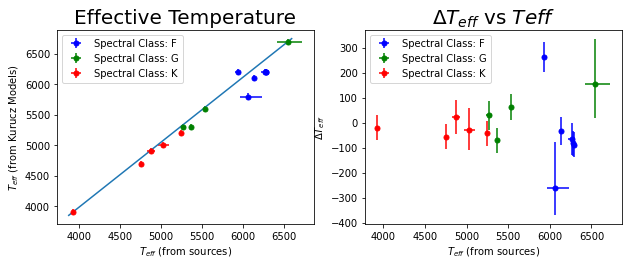

In [60]:
t_f = 20
n_row = 1
n_col = 2
fig = plt.figure(figsize=(4 * n_col, 3 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)

ax = fig.add_subplot(n_row,n_col,1)
point1 = [min(t_irtf)-50, min(t_k)-50]
point2 = [max(t_irtf)+50, max(t_k)+50]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt. plot(x_values, y_values)
idx = np.where(class_data == "F")
plt.errorbar(t_irtf[idx], t_k[idx], xerr=t_irtf_e.T[idx].T, yerr=t_k_e[idx], fmt='ob',markersize='5',label ='Spectral Class: F');
idx = np.where(class_data == "G")
plt.errorbar(t_irtf[idx], t_k[idx], xerr=t_irtf_e.T[idx].T, yerr=t_k_e[idx], fmt='og',markersize='5',label ='Spectral Class: G');
idx = np.where(class_data == "K")
plt.errorbar(t_irtf[idx], t_k[idx], xerr=t_irtf_e.T[idx].T, yerr=t_k_e[idx], fmt='or',markersize='5',label ='Spectral Class: K');
plt.xlabel(r"$T_{eff}$ (from sources)")
plt.ylabel(r"$T_{eff}$ (from Kurucz Models)")
plt.legend(loc ='upper left')   
plt.title("Effective Temperature",fontsize=t_f)

ax = fig.add_subplot(n_row,n_col,2)
idx = np.where(class_data == "F")
plt.errorbar(t_irtf[idx], t_k[idx]-t_irtf[idx], xerr=t_irtf_e.T[idx].T, yerr=np.sqrt(t_k_e[idx]**2 + t_irtf_e.T[idx].T**2), fmt='ob',markersize='5',label ='Spectral Class: F');
idx = np.where(class_data == "G")
plt.errorbar(t_irtf[idx], t_k[idx]-t_irtf[idx], xerr=t_irtf_e.T[idx].T, yerr=np.sqrt(t_k_e[idx]**2+t_irtf_e.T[idx].T**2), fmt='og',markersize='5',label ='Spectral Class: G');
idx = np.where(class_data == "K")
plt.errorbar(t_irtf[idx], t_k[idx]-t_irtf[idx], xerr=t_irtf_e.T[idx].T, yerr=np.sqrt(t_k_e[idx]**2+t_irtf_e.T[idx].T**2), fmt='or',markersize='5',label ='Spectral Class: K');
plt.xlabel(r"$T_{eff}$ (from sources)")
plt.ylabel(r"$\Delta T_{eff}$")
plt.legend(loc ='upper left')   
plt.title(r"$\Delta T_{eff}$ vs $T{eff}$",fontsize=t_f)


/home/kiran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:45: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


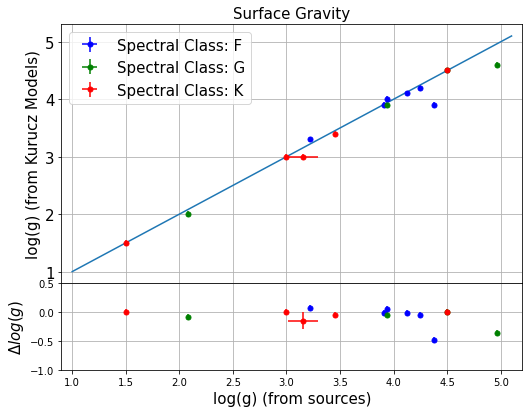

In [10]:
t_f = 15
n_row = 1
n_col = 2

fig1 = plt.figure(1,figsize=(8,6))
#Plot Data-model
frame1 = fig1.add_axes((.1,.3,.8,.6))
point1 = [min(g_irtf)-0.5, min(g_k)-0.5]
point2 = [max(g_irtf)+0.5, max(g_k)+0.5]
p1 = min(point1[0],point1[1])
p2 = min(point2[0],point2[1])
x_values = [p1, p2] #gather x-values.
y_values = [p1, p2] #gather y-values.
plt. plot(x_values, y_values)
idx = np.where(class_data == "F")
plt.errorbar(g_irtf[idx], g_k[idx], xerr=g_irtf_e.T[idx].T, yerr=g_k_e[idx], fmt='ob',markersize='5',label ='Spectral Class: F');
idx = np.where(class_data == "G")
plt.errorbar(g_irtf[idx], g_k[idx], xerr=g_irtf_e.T[idx].T, yerr=g_k_e[idx], fmt='og',markersize='5',label ='Spectral Class: G');
idx = np.where(class_data == "K")
plt.errorbar(g_irtf[idx], g_k[idx], xerr=g_irtf_e.T[idx].T, yerr=g_k_e[idx], fmt='or',markersize='5',label ='Spectral Class: K');
plt.xlabel("log(g) (from sources)",fontsize=t_f)
plt.ylabel("log(g) (from Kurucz Models)",fontsize=t_f)
plt.legend(loc ='upper left',fontsize=t_f)   
plt.title("Surface Gravity",fontsize=t_f)

frame1.set_xticklabels([]) #Remove x-tic labels for the first frame
plt.xticks(fontsize=t_f)
plt.yticks(fontsize=t_f)
plt.grid()
plt.xlim(x_values[0]-0.1,x_values[-1]+0.1)

frame2=fig1.add_axes((.1,.1,.8,.2))        
idx = np.where(class_data == "F")
plt.errorbar(g_irtf[idx], g_k[idx]-g_irtf[idx], xerr=g_irtf_e.T[idx].T, yerr=np.sqrt(g_k_e[idx]**2+g_irtf_e.T[idx].T**2), fmt='ob',markersize='5',label ='Spectral Class: F');
idx = np.where(class_data == "G")
plt.errorbar(g_irtf[idx], g_k[idx]-g_irtf[idx], xerr=g_irtf_e.T[idx].T, yerr=np.sqrt(g_k_e[idx]**2+g_irtf_e.T[idx].T**2), fmt='og',markersize='5',label ='Spectral Class: G');
idx = np.where(class_data == "K")
plt.errorbar(g_irtf[idx], g_k[idx]-g_irtf[idx], xerr=g_irtf_e.T[idx].T, yerr=np.sqrt(g_k_e[idx]**2+g_irtf_e.T[idx].T**2), fmt='or',markersize='5',label ='Spectral Class: K');
plt.xlabel("log(g) (from sources)",fontsize=t_f)
plt.ylabel(r"$\Delta log(g)$",fontsize=t_f)
plt.grid()
plt.xlim(x_values[0]-0.1,x_values[-1]+0.1)
plt.ylim(-1.0,0.5)
#plt.legend(loc ='upper left')   
fig1.tight_layout(pad=0.1)

Text(0.5, 1.0, '$\\Delta log(g)$ vs $log(g)$')

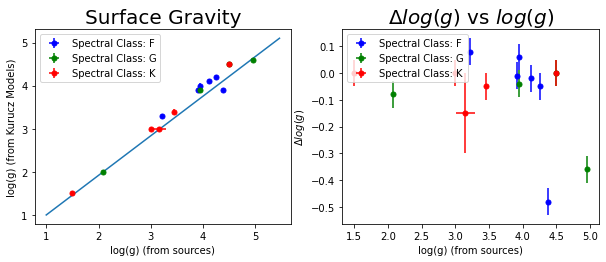

In [64]:
t_f = 20
n_row = 1
n_col = 2
fig = plt.figure(figsize=(4 * n_col, 3 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)

ax = fig.add_subplot(n_row,n_col,1)
point1 = [min(g_irtf)-0.5, min(g_k)-0.5]
point2 = [max(g_irtf)+0.5, max(g_k)+0.5]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt. plot(x_values, y_values)
idx = np.where(class_data == "F")
plt.errorbar(g_irtf[idx], g_k[idx], xerr=g_irtf_e.T[idx].T, yerr=g_k_e[idx], fmt='ob',markersize='5',label ='Spectral Class: F');
idx = np.where(class_data == "G")
plt.errorbar(g_irtf[idx], g_k[idx], xerr=g_irtf_e.T[idx].T, yerr=g_k_e[idx], fmt='og',markersize='5',label ='Spectral Class: G');
idx = np.where(class_data == "K")
plt.errorbar(g_irtf[idx], g_k[idx], xerr=g_irtf_e.T[idx].T, yerr=g_k_e[idx], fmt='or',markersize='5',label ='Spectral Class: K');
plt.xlabel("log(g) (from sources)")
plt.ylabel("log(g) (from Kurucz Models)")
plt.legend(loc ='upper left')   
plt.title("Surface Gravity",fontsize=t_f)

ax = fig.add_subplot(n_row,n_col,2)
idx = np.where(class_data == "F")
plt.errorbar(g_irtf[idx], g_k[idx]-g_irtf[idx], xerr=g_irtf_e.T[idx].T, yerr=np.sqrt(g_k_e[idx]**2+g_irtf_e.T[idx].T**2), fmt='ob',markersize='5',label ='Spectral Class: F');
idx = np.where(class_data == "G")
plt.errorbar(g_irtf[idx], g_k[idx]-g_irtf[idx], xerr=g_irtf_e.T[idx].T, yerr=np.sqrt(g_k_e[idx]**2+g_irtf_e.T[idx].T**2), fmt='og',markersize='5',label ='Spectral Class: G');
idx = np.where(class_data == "K")
plt.errorbar(g_irtf[idx], g_k[idx]-g_irtf[idx], xerr=g_irtf_e.T[idx].T, yerr=np.sqrt(g_k_e[idx]**2+g_irtf_e.T[idx].T**2), fmt='or',markersize='5',label ='Spectral Class: K');
plt.xlabel("log(g) (from sources)")
plt.ylabel(r"$\Delta log(g)$")
plt.legend(loc ='upper left')   
plt.title(r"$\Delta log(g)$ vs $log(g)$",fontsize=t_f)


/home/kiran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:45: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


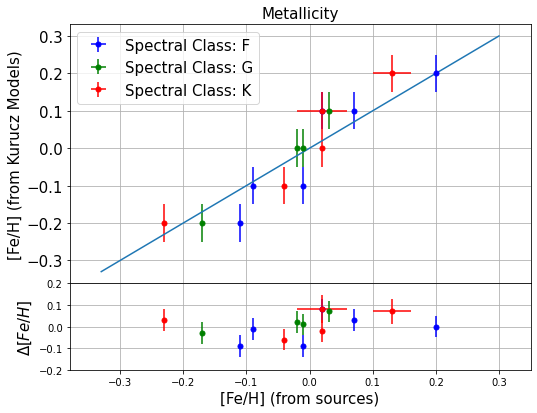

In [11]:
t_f = 15
n_row = 1
n_col = 2

fig1 = plt.figure(1,figsize=(8,6))
#Plot Data-model
frame1 = fig1.add_axes((.1,.3,.8,.6))
point1 = [min(m_irtf)-0.1, min(m_k)-0.1]
point2 = [max(m_irtf)+0.1, max(m_k)+0.1]
p1 = min(point1[0],point1[1])
p2 = min(point2[0],point2[1])
x_values = [p1, p2] #gather x-values.
y_values = [p1, p2] #gather y-values.
plt. plot(x_values, y_values)
idx = np.where(class_data == "F")
plt.errorbar(m_irtf[idx], m_k[idx], xerr=m_irtf_e.T[idx].T, yerr=m_k_e[idx], fmt='ob',markersize='5',label ='Spectral Class: F');
idx = np.where(class_data == "G")
plt.errorbar(m_irtf[idx], m_k[idx], xerr=m_irtf_e.T[idx].T, yerr=m_k_e[idx], fmt='og',markersize='5',label ='Spectral Class: G');
idx = np.where(class_data == "K")
plt.errorbar(m_irtf[idx], m_k[idx], xerr=m_irtf_e.T[idx].T, yerr=m_k_e[idx], fmt='or',markersize='5',label ='Spectral Class: K');
plt.xlabel("[Fe/H] (from sources)",fontsize=t_f)
plt.ylabel("[Fe/H] (from Kurucz Models)",fontsize=t_f)
plt.legend(loc ='upper left',fontsize=t_f)   
plt.title("Metallicity",fontsize=t_f)

frame1.set_xticklabels([]) #Remove x-tic labels for the first frame
plt.xticks(fontsize=t_f)
plt.yticks(fontsize=t_f)
plt.grid()
plt.xlim(x_values[0]-0.05,x_values[-1]+0.05)

frame2=fig1.add_axes((.1,.1,.8,.2))        
idx = np.where(class_data == "F")
plt.errorbar(m_irtf[idx], m_k[idx]-m_irtf[idx], xerr=m_irtf_e.T[idx].T, yerr=np.sqrt(m_k_e[idx]**2+m_irtf_e.T[idx].T**2), fmt='ob',markersize='5',label ='Spectral Class: F');
idx = np.where(class_data == "G")
plt.errorbar(m_irtf[idx], m_k[idx]-m_irtf[idx], xerr=m_irtf_e.T[idx].T, yerr=np.sqrt(m_k_e[idx]**2+m_irtf_e.T[idx].T**2), fmt='og',markersize='5',label ='Spectral Class: G');
idx = np.where(class_data == "K")
plt.errorbar(m_irtf[idx], m_k[idx]-m_irtf[idx], xerr=m_irtf_e.T[idx].T, yerr=np.sqrt(m_k_e[idx]**2+m_irtf_e.T[idx].T**2), fmt='or',markersize='5',label ='Spectral Class: K');
plt.xlabel("[Fe/H] (from sources)",fontsize=t_f)
plt.ylabel(r"$\Delta [Fe/H]$",fontsize=t_f)
plt.grid()
plt.xlim(x_values[0]-0.05,x_values[-1]+0.05)
plt.ylim(-0.2,0.2)
#plt.legend(loc ='upper left')   
fig1.tight_layout(pad=0.1)

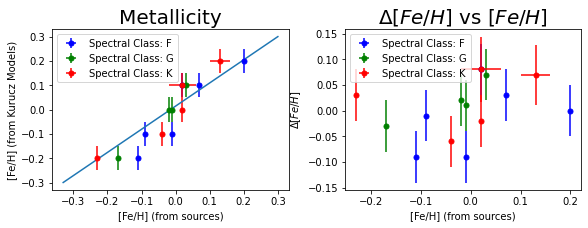

In [68]:
t_f = 20
n_row = 1
n_col = 2
fig = plt.figure(figsize=(4 * n_col, 3 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)

ax = fig.add_subplot(n_row,n_col,1)
point1 = [min(m_irtf)-0.1, min(m_k)-0.1]
point2 = [max(m_irtf)+0.1, max(m_k)+0.1]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt. plot(x_values, y_values)
idx = np.where(class_data == "F")
plt.errorbar(m_irtf[idx], m_k[idx], xerr=m_irtf_e.T[idx].T, yerr=m_k_e[idx], fmt='ob',markersize='5',label ='Spectral Class: F');
idx = np.where(class_data == "G")
plt.errorbar(m_irtf[idx], m_k[idx], xerr=m_irtf_e.T[idx].T, yerr=m_k_e[idx], fmt='og',markersize='5',label ='Spectral Class: G');
idx = np.where(class_data == "K")
plt.errorbar(m_irtf[idx], m_k[idx], xerr=m_irtf_e.T[idx].T, yerr=m_k_e[idx], fmt='or',markersize='5',label ='Spectral Class: K');
plt.xlabel("[Fe/H] (from sources)")
plt.ylabel("[Fe/H] (from Kurucz Models)")
plt.legend(loc ='upper left')   
plt.title("Metallicity",fontsize=t_f)

ax = fig.add_subplot(n_row,n_col,2)
idx = np.where(class_data == "F")
plt.errorbar(m_irtf[idx], m_k[idx]-m_irtf[idx], xerr=m_irtf_e.T[idx].T, yerr=np.sqrt(m_k_e[idx]**2+m_irtf_e.T[idx].T**2), fmt='ob',markersize='5',label ='Spectral Class: F');
idx = np.where(class_data == "G")
plt.errorbar(m_irtf[idx], m_k[idx]-m_irtf[idx], xerr=m_irtf_e.T[idx].T, yerr=np.sqrt(m_k_e[idx]**2+m_irtf_e.T[idx].T**2), fmt='og',markersize='5',label ='Spectral Class: G');
idx = np.where(class_data == "K")
plt.errorbar(m_irtf[idx], m_k[idx]-m_irtf[idx], xerr=m_irtf_e.T[idx].T, yerr=np.sqrt(m_k_e[idx]**2+m_irtf_e.T[idx].T**2), fmt='or',markersize='5',label ='Spectral Class: K');
plt.xlabel("[Fe/H] (from sources)")
plt.ylabel(r"$\Delta [Fe/H]$")
plt.legend(loc ='upper left')   
plt.title(r"$\Delta [Fe/H]$ vs $[Fe/H]$",fontsize=t_f)
fig.tight_layout(pad=0.1)

Text(0.5, 1.0, 'Ks Band Magnitude')

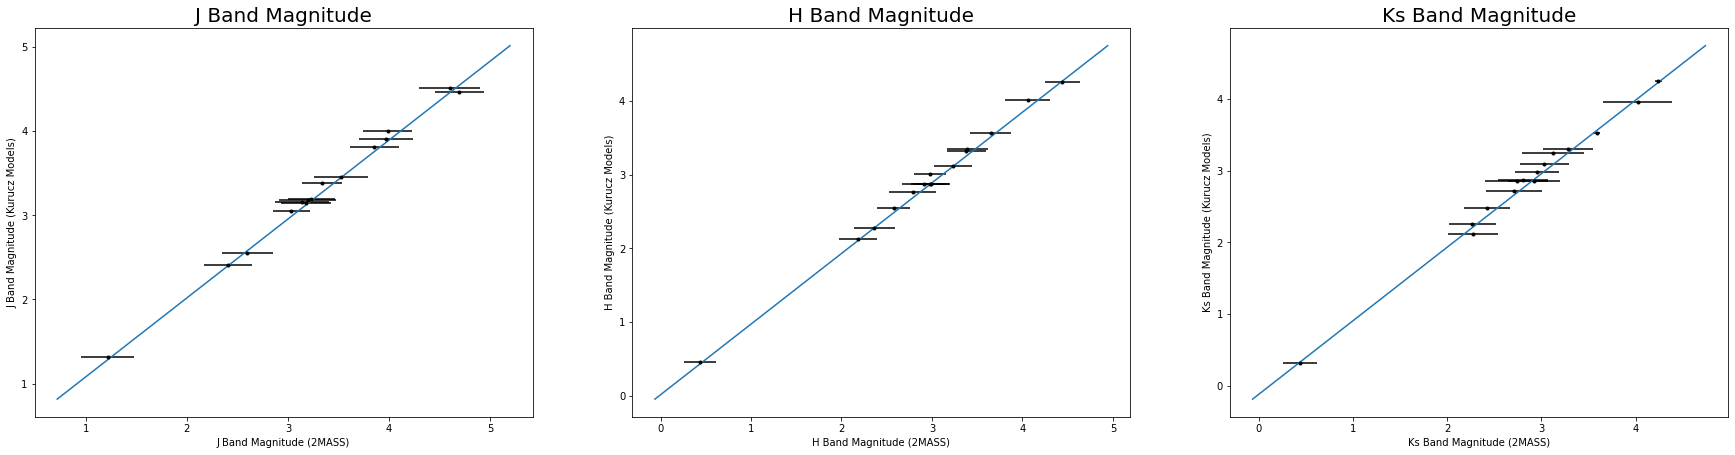

In [55]:

t_f = 20
n_row = 1
n_col = 3
fig = plt.figure(figsize=(8 * n_col, 6 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)

ax = fig.add_subplot(n_row,n_col,1)
point1 = [min(J_ref)-0.5, min(J)-0.5]
point2 = [max(J_ref)+0.5, max(J)+0.5]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt. plot(x_values, y_values)
plt.errorbar(J_ref, J, xerr=J_ref_err, fmt='.k');
plt.xlabel("J Band Magnitude (2MASS)")
plt.ylabel("J Band Magnitude (Kurucz Models)")
plt.title("J Band Magnitude",fontsize=t_f)
ax = fig.add_subplot(n_row,n_col,2)
point1 = [min(H_ref)-0.5, min(H)-0.5]
point2 = [max(H_ref)+0.5, max(H)+0.5]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt. plot(x_values, y_values)
plt.errorbar(H_ref, H, xerr=H_ref_err, fmt='.k');
plt.xlabel("H Band Magnitude (2MASS)")
plt.ylabel("H Band Magnitude (Kurucz Models)")
plt.title("H Band Magnitude",fontsize=t_f)
ax = fig.add_subplot(n_row,n_col,3)
point1 = [min(Ks_ref)-0.5, min(Ks)-0.5]
point2 = [max(Ks_ref)+0.5, max(Ks)+0.5]
x_values = [point1[0], point2[0]] #gather x-values.
y_values = [point1[1], point2[1]] #gather y-values.
plt. plot(x_values, y_values)
plt.errorbar(Ks_ref, Ks, xerr=Ks_ref_err, fmt='.k');
plt.xlabel("Ks Band Magnitude (2MASS)")
plt.ylabel("Ks Band Magnitude (Kurucz Models)")
plt.title("Ks Band Magnitude",fontsize=t_f)